In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

We start with a normal variable $X$ with mean $\mu = 0$ and variance $\sigma^2 = 1$. The pdf of $X$, and a histogram of empirical samples, are plotted below.

(array([0.003, 0.018, 0.036, 0.078, 0.111, 0.174, 0.264, 0.366, 0.354,
        0.393, 0.363, 0.321, 0.201, 0.162, 0.078, 0.051, 0.012, 0.012,
        0.   , 0.003]),
 array([-3.09522063, -2.75733598, -2.41945133, -2.08156668, -1.74368203,
        -1.40579738, -1.06791273, -0.73002808, -0.39214343, -0.05425878,
         0.28362587,  0.62151052,  0.95939517,  1.29727982,  1.63516447,
         1.97304913,  2.31093378,  2.64881843,  2.98670308,  3.32458773,
         3.66247238]),
 <BarContainer object of 20 artists>)

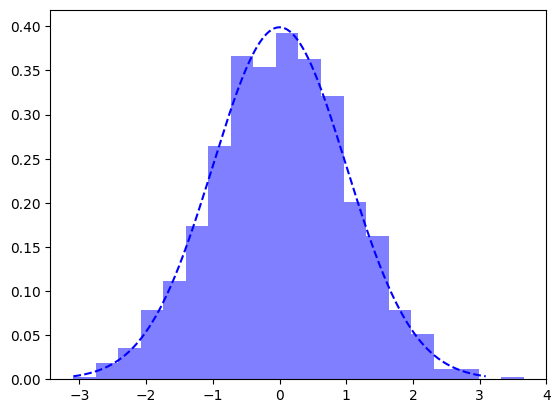

In [2]:
# define a new normal random variable
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), c='b', ls='--')
vals = norm.rvs(size=1000)
ax.hist(vals, bins=20, weights=0.003*np.ones_like(vals),
        alpha=0.5, color='b', ls='--')


We'll now sample from the distribution. Take $n$ independent observations $X_1, \dotsc, X_n$; each is a normally distributed random variable with expected value 0 and variance 1. The **sample mean** and **sample variance** are defined by
$$\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i, \quad \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^2.$$
These are also both random variables. Note that both can be computed directly from the sample, without knowing anything about the underlying distribution. The question is: what do these observable statistics of the sample tell us about unobservable features of the distribution?

Run the cell below to initialize the sampling process. `n` determines the number of observations to take for each sample, while `iters_at_once` determines how many times to sample before redrawing the graphs. You may want to start with one iteration so that you can see the average $\overline{X}$ and $\hat{\sigma}^2$ slowly evolving over time, and then increase to `iters_at_once = 100` or so to see the convergence faster.

In [3]:
n = 5 # number of observations in a sample
iters_at_once = 100
# number of times to take samples with one command
samples = []
sample_means = []
sample_vars = []

Run the cell below to take samples. The left-hand graph shows the observations $X_i$, together with their mean $\overline{X}$ in green, and displays the values of $\overline{X}$ and $\hat{\sigma}^2$. The right-hand graph shows the average value of the sample mean (green) and sample variance (orange) over time. We see that $E(\overline{X})$ converges to 0 (the actual mean), while $E(\hat{\sigma}^2)$ converges to $\frac{n-1}{n}$ (which is *less* than the actual variance of 1).

*(You should run this cell several times. The right-hand graph will display nothing if only one sampling iteration has been performed. You also may not see the curves for low numbers of iterations if they happen to lie outside the y-axis bounds.)* 

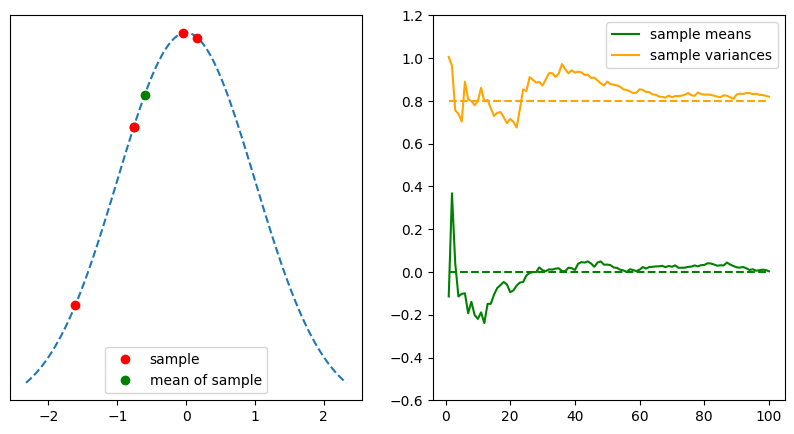

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
# take batch of samples
for i in range(iters_at_once):
    next_sample = norm.rvs(size=n)
    next_mean = np.mean(next_sample)
    next_var = np.var(next_sample)
    samples.append(next_sample)
    sample_means.append(next_mean)
    sample_vars.append(next_var)
# plot normal curve
x_crv = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax[0].plot(x_crv, norm.pdf(x_crv), '--')
# plot last sample
sample_densities = norm.pdf(next_sample)
ax[0].plot(next_sample, sample_densities, 'ro',
          label="sample")
# plot mean of sample
ax[0].plot(next_mean, norm.pdf(next_mean), 'go',
          label="mean of sample")
ax[0].axes.yaxis.set_visible(False)
ax[0].legend()
# second plot: plot sample means and variances so far
sample_count = np.arange(1, len(sample_means)+1)
av_sample_means = np.cumsum(sample_means) / sample_count
av_sample_vars = np.cumsum(sample_vars) / sample_count
ax[1].plot(sample_count, av_sample_means, 'g', label="sample means")
ax[1].plot(sample_count, av_sample_vars, 'orange', label="sample variances")
# plot expected values
ax[1].plot(sample_count, np.zeros_like(sample_count), c='g', ls='--')
ax[1].plot(sample_count, np.ones_like(sample_count)*(n-1)/n, c='orange', ls='--')
ax[1].set_ylim([-0.6,1.2])
ax[1].legend()

What is going on? If we want to get a good approximation to the actual variance, we should be calculating how our sample points differ from the *actual* mean $\mu$,
$$\frac{1}{n}\sum_{i=1}^n (X_i - \mu)^2.$$
But if the distribution is unknown, all we can calculate is the variance from the *sample* mean,
$$\frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^2.$$
As the left-hand graph above shows, in general the sample points are closer to their own mean $\overline{X}$ than to the actual mean $\mu = 0$. (This is particularly clear when many of the sample points are on one side of the distribution.) So $\hat{\sigma}^2$ systematically underestimates the actual variance, especially for small values of $n$.

Bessel showed that an unbiased estimate of the actual variance is
$$s^2 = \frac{n-1}{n}\hat{\sigma}^2.$$
More precisely, $\overline{X}$ is normally distributed with 
$$E(\overline{X}) = \mu, \quad \mathrm{Var}(\overline{X}) = \frac{\sigma^2}{n},$$
while $\frac{n}{\sigma^2}\hat{\sigma}^2 = \frac{n-1}{\sigma^2}s^2$ is a standard $\chi^2$ distribution with $n-1$ degrees of freedom, so that
$$E(\hat{\sigma}^2) = \frac{n-1}{n}\sigma^2, \quad \mathrm{Var}(\hat{\sigma}^2) = \frac{2(n-1)}{n^2} \sigma^4,$$
and
$$E(s^2) = \sigma^2, \quad \mathrm{Var}(s^2) = \frac{2}{n^2}\sigma^4.$$
These are shown in the histograms below.

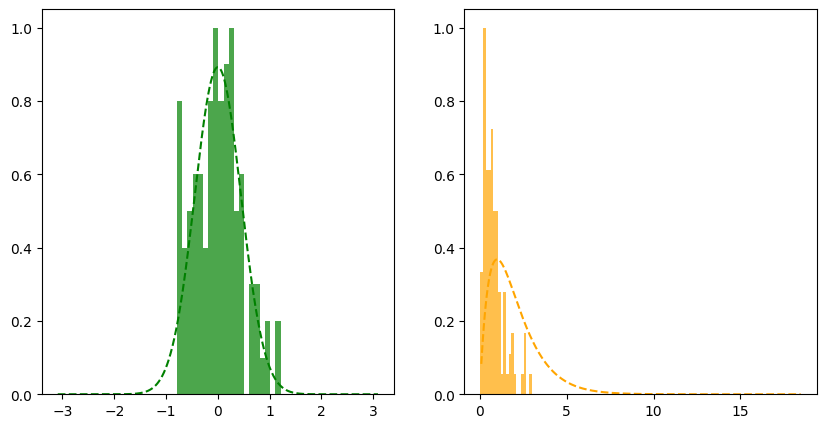

In [5]:
# histogram of means and variances of samples
# sample means are normal, sample variances are chi-squared with n-1 degrees of freedom
fig, ax = plt.subplots(1, 2, figsize=(10,5))
mean_counts, mean_bins = np.histogram(sample_means, bins=20)
mean_yscale = 1/np.max(mean_counts)
ax[0].hist(mean_bins[:-1], mean_bins, weights=mean_counts*mean_yscale, color='g', alpha=0.7)
var_counts, var_bins = np.histogram(sample_vars, bins=20)
var_yscale = 1/np.max(var_counts)
ax[1].hist(var_bins[:-1], var_bins, weights=var_counts*var_yscale, color='orange', alpha=0.7)
# theoretical curves
norm_x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
norm_y = norm.pdf(norm_x, loc=0, scale=1/np.sqrt(n))
ax[0].plot(norm_x, norm_y, color='g', ls='--')

chi2_x = np.linspace(chi2.ppf(0.001, df=n-1), chi2.ppf(0.999, df=n-1), 1000)
chi2_y = chi2.pdf(chi2_x, scale=1/np.sqrt(n-1), df=n-1)
ax[1].plot(chi2_x, chi2_y, color='orange', ls='--')

**To add:**
- Confidence intervals for distribution mean: vary $n$ and see how it affects the SD of the sample means
- Generate 20 95% confidence intervals and see how many contain the true mean
- Finite population corrections
- Ratio estimation: generate correlated $X$ and $Y$, and compare confidence intervals obtained from mean estimate with those obtained from ratio estimate

In the preceding example, the distribution being sampled from was truly normal. In many real-world examples, we are really sampling from a finite population without replacement, which introduces further complications. For example, suppose we want to estimate the average income of the households in a 500-household community. We might do this by surveying 100 of the households. Even if we think of the population of 500 data points as generated, in some sense, by a normal distribution, the data points of our sample are *no longer independent from each other*, because they were taken without replacement.